## Individual Assignment: Data Exploration
### Civic Art Collection, San Francisco

In this assignment, I'll dive deep into San Francisco's collection of art by way of a dataset downloaded from [DataSF](https://datasf.org/opendata/). This dataset encompasses all of the publicly-sited works in the city's Civic Art Collection, including historic monuments, murals, and artwork commissioned through the City's Public Art Program. My goals are to get a better understanding of what types of artwork are included in this collection, and figure out where they're located across the city.

#### Alright, I'll admit that this is my first real attempt at coding. Let's give this a try!

I'll start by importing both geopandas and pandas:

In [33]:
import pandas as pd
import geopandas as gpd

Now time to import, read, and assign a name to my chosen dataset! I'll refer to the data as 'art' moving forward.

In [34]:
# importing my shapefile to this notebook
art = gpd.read_file('data/Civic Art Collection.zip')

Now that I've imported my data, let's see what exactly we're working with!

In [35]:
# what's the data type?
type(art)

geopandas.geodataframe.GeoDataFrame

Good, I pulled spatial data in and the system is recognizing it as such. Now let's look at a sample of 3 random rows from the dataset to get a better sense for the information contained within:

In [36]:
# what exactly does my data look like? 
art.head(3)

,creation_d,accession_,artist,credit_lin,display_ti,display_di,medium,media_supp,facility,current_lo,location_d,street_add,zip_code,latitude,longitude,number_of_,cultural_d,supervisor,geometry
0,None,T2018.46.i,"O'Malley, Susan",None,Advice from My 80-Year-Old Self: It's Not a Du...,35 7/8 x 17 in.,None,Digital print on archival rag paper,Terminal 1,SFO,BAB,None,94128,37.62043,-122.399165,0.0,None,None,POINT (-122.39916 37.62043)
1,1982,1985.5.3,"Adams, Mark",Purchased by the San Francisco Art Commission ...,Garden Outside the Gate (The Garden Tapestries),84 x 144 in.,Flat weave wool tapestry,Flat weave wool tapestry,Terminal 2,SFO,"Departures Meeting Area, Level 2, BA/D",None,94128,37.62043,-122.399165,0.0,None,None,POINT (-122.39916 37.62043)
2,2008,2008.4.a-c,"Hsu, Joyce",None,Namoo House,None,Anodized aluminum and stainless steel,Anodized aluminum and stainless steel,International Terminal,SFO,"Gate A3, BA/A, Level 3",None,94128,37.62043,-122.399165,0.0,None,None,POINT (-122.39916 37.62043)


That's a lot of columns and information! I will need to trim the data down before I can further visualize or interpret it, but let's find out a bit more about the overall dataset first. 

In [37]:
art.dtypes

creation_d      object
accession_      object
artist          object
credit_lin      object
display_ti      object
display_di      object
medium          object
media_supp      object
facility        object
current_lo      object
location_d      object
street_add      object
zip_code        object
latitude       float64
longitude      float64
number_of_     float64
cultural_d      object
supervisor      object
geometry      geometry
dtype: object

Okay, so we have a mix of objects, floats, and geometry within this data. Let's dig a bit deeper...

In [38]:
art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   creation_d  941 non-null    object  
 1   accession_  1038 non-null   object  
 2   artist      1038 non-null   object  
 3   credit_lin  971 non-null    object  
 4   display_ti  1038 non-null   object  
 5   display_di  947 non-null    object  
 6   medium      1007 non-null   object  
 7   media_supp  1026 non-null   object  
 8   facility    1005 non-null   object  
 9   current_lo  1036 non-null   object  
 10  location_d  968 non-null    object  
 11  street_add  906 non-null    object  
 12  zip_code    1033 non-null   object  
 13  latitude    1038 non-null   float64 
 14  longitude   1038 non-null   float64 
 15  number_of_  1038 non-null   float64 
 16  cultural_d  196 non-null    object  
 17  supervisor  880 non-null    object  
 18  geometry    1038 non-null   geometry
dty

Again, lots of columns and over 1,000 entries in this dataset! Let's do a simplified function to see how many distinct rows and columns are in the entire dataset:

In [39]:
art.shape

(1038, 19)

Wow, the city has 1,038 documented pieces of art in its civic collection! I'm excited to visualize their placement across the city.

Looking back through the information we've pulled so far, I think I'll narrow down the 19 current columns to the following 8 columns: artist, display_ti, medium, zip_code, latitude, longitude, supervisor, and geometry. 
More to come on that shortly!

Out of curiousity, let's also see if I can figure out the most common medium for civic art in this collection. Let's start with a sampling of that column: 

In [40]:
# column name in brackets
# single column
art['medium'].sample(3)

914    Glazed ceramic tile
915          Pigment print
108                 Fresco
Name: medium, dtype: object

Interesting! Quite an array of mediums for public art - but what I really want to see is a more detailed breakdown so that I can figure out the most common medium in this collection. Let's try a slightly different function. 

In [41]:
art['medium'].value_counts()

Bronze                                                             144
Granite                                                             34
Stainless steel                                                     33
Fresco                                                              29
Photographic print on porcelain enamel                              28
                                                                  ... 
Sandstone                                                            1
Red granite                                                          1
Cement, polymer and glass                                            1
Acrylic paint, oil, collage, spray paint, glitter, color pencil      1
Granite and concrete                                                 1
Name: medium, Length: 346, dtype: int64

Interesting! Bronze, by far, is the most common medium - followed by granite and stainless steel. I'm guessing most of these are statues?  

Anyways, now that I understand the data a bit better, let's see if we can visualize it. Before I do so, I still need to clean it up a bit. Let me start by getting rid of the columns that I no longer need. 

In [42]:
# output the original data's info again
art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   creation_d  941 non-null    object  
 1   accession_  1038 non-null   object  
 2   artist      1038 non-null   object  
 3   credit_lin  971 non-null    object  
 4   display_ti  1038 non-null   object  
 5   display_di  947 non-null    object  
 6   medium      1007 non-null   object  
 7   media_supp  1026 non-null   object  
 8   facility    1005 non-null   object  
 9   current_lo  1036 non-null   object  
 10  location_d  968 non-null    object  
 11  street_add  906 non-null    object  
 12  zip_code    1033 non-null   object  
 13  latitude    1038 non-null   float64 
 14  longitude   1038 non-null   float64 
 15  number_of_  1038 non-null   float64 
 16  cultural_d  196 non-null    object  
 17  supervisor  880 non-null    object  
 18  geometry    1038 non-null   geometry
dty

In [43]:
# now let's create a dataframe with a specific subset of the columns that I identified earlier
art[['artist', 'display_ti', 'medium', 'media_supp', 'zip_code', 'latitude', 'longitude', 'supervisor', 'geometry']]

,artist,display_ti,medium,media_supp,zip_code,latitude,longitude,supervisor,geometry
0,"O'Malley, Susan",Advice from My 80-Year-Old Self: It's Not a Du...,None,Digital print on archival rag paper,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
1,"Adams, Mark",Garden Outside the Gate (The Garden Tapestries),Flat weave wool tapestry,Flat weave wool tapestry,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
2,"Hsu, Joyce",Namoo House,Anodized aluminum and stainless steel,Anodized aluminum and stainless steel,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
3,"Drew, Leonardo",Number 69S,Mixed Media,Mixed Media,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
4,"Diebenkorn, Richard",Untitled from Nine Drypoints and Etchings,drypoint and etching,drypoint and etching on paper,94128,37.612426,-122.393741,None,POINT (-122.39374 37.61243)
...,...,...,...,...,...,...,...,...,...
1033,"Fuller (McChesney), Mary",Lion,cast concrete,cast concrete,94108,37.794450,-122.404780,03,POINT (-122.40478 37.79445)
1034,"Margrill, Anita and Nagasawa, Nobuho",Untitled (Pole-mounted sculpture),Stainless steel,Stainless steel on painted steel,94124,37.740380,-122.388830,10,POINT (-122.38883 37.74038)
1035,"Su?rez-Wolfe, Primitivo",Domestic Seating,Bronze,Bronze,94114,37.769460,-122.429120,08,POINT (-122.42912 37.76946)
1036,Wowhaus,Sunnyside Menagerie [glyphies],Bronze,Bronze on concrete,94131,37.731901,-122.440806,07,POINT (-122.44081 37.73190)


Glad that worked! Now I have to define this list of desired columns before I can create a new variable.

In [44]:
# create and define a list of desired column names
desired_columns = ['artist', 'display_ti', 'medium', 'media_supp', 'zip_code', 'latitude', 'longitude', 'supervisor', 'geometry']

# subset based on desired columns
art[desired_columns].sample(3)

,artist,display_ti,medium,media_supp,zip_code,latitude,longitude,supervisor,geometry
621,"Yung, Rene",lamp (Take Root),Aluminum and lighting,Aluminum and lighting,94108,37.795231,-122.410195,03,POINT (-122.41019 37.79523)
412,"Patigian, Haig",General John J. Pershing (1860-1948),Bronze,Bronze on granite,94118,37.769616,-122.467719,01,POINT (-122.46772 37.76962)
426,"deSoto, Lewis",1865-1906: The Foundation of the Almshouse and...,cotton thread tapestry,cotton thread tapestry,94131,37.748793,-122.455811,07,POINT (-122.45581 37.74879)


In order to preserve this new, trimmed dataframe, I'm going to have to declare it as a new variable. Let's call this new variable 'art_trim'moving forward.

In [45]:
art_trim = art[desired_columns].copy()
art_trim

,artist,display_ti,medium,media_supp,zip_code,latitude,longitude,supervisor,geometry
0,"O'Malley, Susan",Advice from My 80-Year-Old Self: It's Not a Du...,None,Digital print on archival rag paper,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
1,"Adams, Mark",Garden Outside the Gate (The Garden Tapestries),Flat weave wool tapestry,Flat weave wool tapestry,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
2,"Hsu, Joyce",Namoo House,Anodized aluminum and stainless steel,Anodized aluminum and stainless steel,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
3,"Drew, Leonardo",Number 69S,Mixed Media,Mixed Media,94128,37.620430,-122.399165,None,POINT (-122.39916 37.62043)
4,"Diebenkorn, Richard",Untitled from Nine Drypoints and Etchings,drypoint and etching,drypoint and etching on paper,94128,37.612426,-122.393741,None,POINT (-122.39374 37.61243)
...,...,...,...,...,...,...,...,...,...
1033,"Fuller (McChesney), Mary",Lion,cast concrete,cast concrete,94108,37.794450,-122.404780,03,POINT (-122.40478 37.79445)
1034,"Margrill, Anita and Nagasawa, Nobuho",Untitled (Pole-mounted sculpture),Stainless steel,Stainless steel on painted steel,94124,37.740380,-122.388830,10,POINT (-122.38883 37.74038)
1035,"Su?rez-Wolfe, Primitivo",Domestic Seating,Bronze,Bronze,94114,37.769460,-122.429120,08,POINT (-122.42912 37.76946)
1036,Wowhaus,Sunnyside Menagerie [glyphies],Bronze,Bronze on concrete,94131,37.731901,-122.440806,07,POINT (-122.44081 37.73190)


Perfect! My data is now trimmed and showing only the columns/information I'm looking for, so let's go ahead and get into some visualizations. I'll start with a simple plot graph. 

<AxesSubplot: >

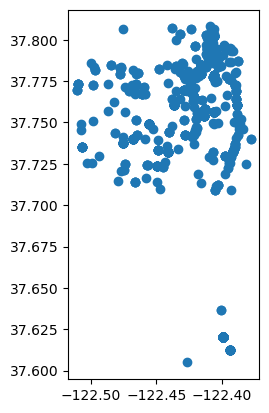

In [46]:
art_trim.plot()

My first visualization, exciting! I think those dots at the very bottom right are all of the public art pieces on display at SFO Airport. Very cool.

But, I think I can make this plot a bit more visually appealing. Let's play with the sizing, colors, and legend next. 

<AxesSubplot: >

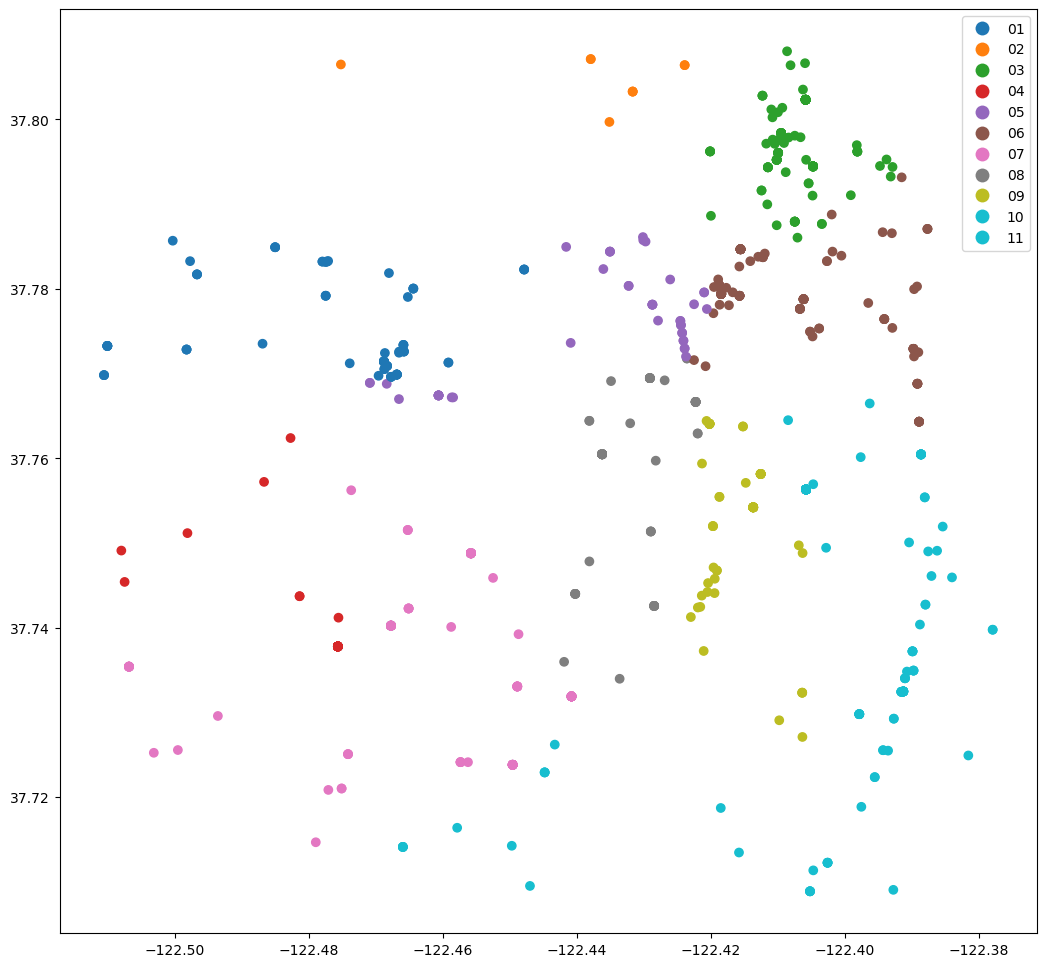

In [47]:
art_trim.plot(
            figsize=(14,12),   # determines the size of the plot 
            column = 'supervisor',   # column that defines the color of the dots
            legend = True,     # adds a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this places the legend on the side
) 

Okay, this is pretty cool! I went ahead and color coded the points on the plot graph according to the supervisory district that they're located in. San Francisco is broken up into 11 districts, so this graph now gives us a better sense of how public art is spread out amongst those districts. 

I'll note: from the functions and information earlier in this notebook, I know that not all of the art pieces had data on their associated district, but nearly 900 of them did - so this is a pretty good representation of the overall dataset. I can even (slightly) see that the points on the graph look like the geography of San Francisco!

Now, I want to see if I can create a more detailed folium map with interactive and color coded points. Here we go...

### Let's Make Some Maps

To start making more interactive and accurate maps, we must first import the folium library. 

In [48]:
import folium

In [49]:
# default folium map
m = folium.Map()
m

Here's a map of the whole world - but my data is all in San Francisco! Let's adjust. 

In [50]:
# find the average latitude of the data points first
latitude = art_trim.latitude.mean()
latitude

37.741717888974996

In [51]:
# next we find the average longitude 
longitude = art_trim.longitude.mean()
longitude

-122.42401938244218

So the center value of this dataset, in terms of latitude/longitude is: (37.741717888974996, -118.24713253124999)

Let's make this point the new center of our map: 

In [52]:
# centered based on the average lat/lon calculated above
m = folium.Map(location=[37.741717888974996, -122.42401938244218])
m

Great - that's definitely San Francisco! 

Now that we have a base map, I want to add interactive markers representing each art piece, color coded by supervisory district. When you hover over these markers, I want to be able to see the name of the art piece. To do that, I'll first need to run a loop through the dataframe.

In [53]:
# run a loop through a dataframe:
for index, row in art_trim.iterrows():
    print(row.display_ti, row.latitude, row.longitude)

Advice from My 80-Year-Old Self: It's Not a Dumb Idea 37.620430000000056 -122.39916499999998
Garden Outside the Gate (The Garden Tapestries) 37.620430000000056 -122.39916499999998
Namoo House 37.620430000000056 -122.39916499999998
Number 69S 37.620430000000056 -122.39916499999998
Untitled from Nine Drypoints and Etchings 37.61242625700004 -122.39374060299997
Green Map 37.61242625700004 -122.39374060299997
Metamorphosis 37.620430000000056 -122.39916499999998
Sky Dancing 37.74879299500003 -122.45581098899999
Dahlias 37.77283722400006 -122.49823131399995
Two Wings for Wall and Person 37.620430000000056 -122.39916499999998
Untitled 37.620430000000056 -122.39916499999998
Advice from My 80-Year-Old Self: Do More of What You Love 37.620430000000056 -122.39916499999998
Roll 37.78391099000004 -122.40054398899997
Advice from My 80-Year-Old Self: It is Possible 37.620430000000056 -122.39916499999998
Solar Totems 37.73598004000007 -122.44190993799998
Winter/Spring, Standing in Claremont Canyon 37.

Wow, I think that's all 1000+ rows! Lots of data. 

Next, lets add the markers (with the titles of the art pieces) to the map: 

In [54]:
for index, row in art_trim.iterrows():
    # add folium marker code that shows display name of each art piece
    folium.Marker([row.latitude, row.longitude], popup=row.display_ti, tooltip=row.display_ti).add_to(m)
m

Great! But I still need to color code the markers according to the district in which they are located, and format the map in a more user-friendly way. 

In [55]:
# lets add a new column dedicated to color
art_trim['color'] = ''

In [56]:
art_trim.head(3)

,artist,display_ti,medium,media_supp,zip_code,latitude,longitude,supervisor,geometry,color
0,"O'Malley, Susan",Advice from My 80-Year-Old Self: It's Not a Du...,None,Digital print on archival rag paper,94128,37.62043,-122.399165,None,POINT (-122.39916 37.62043),
1,"Adams, Mark",Garden Outside the Gate (The Garden Tapestries),Flat weave wool tapestry,Flat weave wool tapestry,94128,37.62043,-122.399165,None,POINT (-122.39916 37.62043),
2,"Hsu, Joyce",Namoo House,Anodized aluminum and stainless steel,Anodized aluminum and stainless steel,94128,37.62043,-122.399165,None,POINT (-122.39916 37.62043),


Okay, that worked! Now I need to assign color values based on the column titled 'supervisor' 

In [57]:
# find unique values in the supervisor column
art_trim.supervisor.unique()

array([None, '07', '01', '06', '08', '03', '10', '09', '04', '05', '11',
       '02'], dtype=object)

There are 11 districts, so I need to assign 11 color values - one for each district. 

In [58]:
# Add a color value to each of the eleven districts
art_trim.loc[art_trim['supervisor'] == '01', 'color'] = 'blue'
art_trim.loc[art_trim['supervisor'] == '02', 'color'] = 'green'
art_trim.loc[art_trim['supervisor'] == '03', 'color'] = 'purple'
art_trim.loc[art_trim['supervisor'] == '04', 'color'] = 'orange'
art_trim.loc[art_trim['supervisor'] == '05', 'color'] = 'beige'
art_trim.loc[art_trim['supervisor'] == '06', 'color'] = 'darkblue'
art_trim.loc[art_trim['supervisor'] == '07', 'color'] = 'cadetblue'
art_trim.loc[art_trim['supervisor'] == '08', 'color'] = 'pink'
art_trim.loc[art_trim['supervisor'] == '09', 'color'] = 'gray'
art_trim.loc[art_trim['supervisor'] == '10', 'color'] = 'lightgreen'
art_trim.loc[art_trim['supervisor'] == '11', 'color'] = 'red'

Great, let's make sure that that worked by pulling an updated sample of the data. 

In [59]:
art_trim.sample(3)

,artist,display_ti,medium,media_supp,zip_code,latitude,longitude,supervisor,geometry,color
561,"Olmsted, Jr., Frederick Law",Edison,Tuff stone,Tuff stone,94112,37.723827,-122.449584,07,POINT (-122.44958 37.72383),cadetblue
787,"Finneran, Bean",Untitled [north wall],Glazed ceramic tile,Glazed ceramic tile,94132,37.725084,-122.474146,07,POINT (-122.47415 37.72508),cadetblue
486,"Fuller (McChesney), Mary",Bench support (Monkey),cast concrete,cast concrete,94108,37.794450,-122.404780,03,POINT (-122.40478 37.79445),purple


Yes! I'm seeing color values for each art piece, based on their respective supervisory district, so this appears to be working. 
Now it's time to add color-coded icons and update the map!

In [60]:
# let's reset the map and get ready to add the color-coded icons
m = folium.Map(location=[latitude,longitude], tiles='CartoDB positron', zoom_start=12)

In [61]:
# alright, lets finally add the color-coded and interactive icons
for index, row in art_trim.iterrows():
    tooltip_text = row.display_ti
    folium.Marker(
        [row.latitude,row.longitude], 
        popup=row.display_ti, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

/tmp/ipykernel_74/303235411.py:8: UserWarning: color argument of Icon should be one of: {'lightgray', 'darkgreen', 'lightred', 'darkred', 'orange', 'lightgreen', 'green', 'white', 'black', 'darkpurple', 'red', 'beige', 'darkblue', 'lightblue', 'purple', 'gray', 'pink', 'cadetblue', 'blue'}.
  icon=folium.Icon(color=row.color)


That worked, wow! Now, I have an interactive map of San Francisco and its civic art collection. I can tell which art pieces are located in which districts (according to their icon color), and I can scroll over each icon to see the name of the art piece. Pretty cool!

Based on initial observations of this map, it looks like most of the city's civic art is concentrated on the east side of the city - especially along the waterfront. Art is definiely more spread out on the west side, which makes sense since that's the more residential part of the city. 
A lot of the art is located in parks, which is also not that surprising. Golden Gate Park, for instance, has a bunch of statues. Meanwhile, neighborhoods like Cole Valley, Twin Peaks, and NoPa have very few pieces of civic art. Maybe that represents an opportunity for more civic art in those areas moving forward? Just a thought!

In [62]:
# finally, I'll save the interactive maps as an html file
m.save('art.html')

Alright, it appears that I'm having issues with github not showing my maps (it's telling me that I need to "make this Notebook Trusted to load map: File -> Trust Notebook" which I thought I did, but I can't seemt to figure out how to override this error) so I'm providing a link below to access the notebook in a window that displays all of my maps correctly! 
For reference, I found this solution [here](https://stackoverflow.com/questions/73012552/make-this-notebook-trusted-to-load-map-file-trust-notebook-error-on-github).  

[View notebook with interactive maps!](https://nbviewer.org/github/rlkovinsky/up221-rachel/blob/main/week02/week%201%20assignment.ipynb)